In [19]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#Input Layer
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())#for flat layer

#Hidden Layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))# 128 neaurons, with sigmoid function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#Output Layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))#Softmax for probability distribution

#Define parameters of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#Training the model
model.fit(x_train,y_train,epochs=3)

#print(x_train[0])




Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2580 - accuracy: 0.9249
Epoch 2/3
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1055 - accuracy: 0.9666
Epoch 3/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0722 - accuracy: 0.9770


In [20]:
#Calculate val-loss and val_accuracy
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.1033 - accuracy: 0.9688
0.10330955678466708 0.9688


In [21]:
model.save('num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_reader.model\assets


In [24]:
new_model=tf.keras.models.load_model('num_reader.model')

In [27]:
predictions=new_model.predict(x_test)

In [28]:
print(predictions)

[[7.07728063e-08 1.69396714e-07 1.71615058e-04 ... 9.97312307e-01
  1.31764023e-06 2.61072842e-07]
 [1.34592408e-08 6.50922186e-04 9.99344170e-01 ... 2.86342079e-08
  1.68412370e-07 6.16316775e-10]
 [5.64109079e-08 9.99921799e-01 5.80998267e-06 ... 5.40507426e-05
  8.22970105e-06 1.42388160e-06]
 ...
 [1.24376198e-09 3.23777545e-06 7.50229390e-08 ... 3.53689975e-05
  1.12254875e-05 3.23634275e-04]
 [7.76651814e-06 3.59896035e-07 3.74103479e-07 ... 4.31319359e-06
  2.17827677e-04 4.66153249e-09]
 [2.50069274e-06 1.72671655e-08 8.47569055e-08 ... 6.60613231e-10
  2.34420590e-08 8.44541326e-09]]


In [33]:
import numpy as np
print(np.argmax(predictions[1]))

2


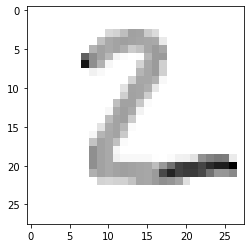

In [34]:
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.show()

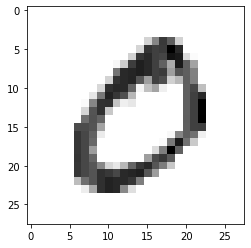

In [15]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()